In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.duplicated().sum()


0

In [9]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [12]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [13]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True,dtype = float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  float64
 10  Geography_Spain    10000 non-null  float64
 11  Gender_Male        10000 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 937.6 KB


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Exited'],axis=1),df['Exited'],test_size=0.2,random_state=1)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [24]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7383 - loss: 0.5753 - val_accuracy: 0.7975 - val_loss: 0.4761
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8037 - loss: 0.4569 - val_accuracy: 0.7975 - val_loss: 0.4511
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8040 - loss: 0.4358 - val_accuracy: 0.8100 - val_loss: 0.4354
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8201 - loss: 0.4226 - val_accuracy: 0.8194 - val_loss: 0.4213
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8303 - loss: 0.4032 - val_accuracy: 0.8250 - val_loss: 0.4077
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8344 - loss: 0.3931 - val_accuracy: 0.8300 - val_loss: 0.3942
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8470 - loss: 0.3846 - val_accuracy: 0.8450 - val_loss: 0.3817
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8513 - loss: 0.3738 - val_accu

In [25]:
model.layers[0].get_weights()

[array([[ 7.45372251e-02, -4.27517921e-01, -7.93165267e-02,
         -7.20357373e-02,  2.41672084e-01, -5.49751520e-01,
          2.41923317e-01, -2.34119862e-01,  3.01109225e-01,
          7.39917830e-02,  9.86356661e-02],
        [-9.47579145e-01,  1.13388211e-01,  2.14814827e-01,
          1.58145714e+00,  7.18333960e-01, -6.08774163e-02,
          1.53622255e-01, -8.64287242e-02, -6.40483379e-01,
         -1.69852719e-04, -3.67891699e-01],
        [-3.04806232e-01,  3.45977187e-01, -1.21613212e-01,
          3.70303430e-02,  2.18356445e-01,  3.42393011e-01,
         -1.83140725e-01, -4.90643755e-02, -3.55080634e-01,
         -1.24063708e-01, -1.38070881e-01],
        [-2.36087162e-02, -5.62050752e-02, -4.42357093e-01,
         -3.21331888e-01, -1.24564625e-01,  6.01769760e-02,
         -6.80349052e-01, -1.01414122e-01, -1.96803033e-01,
          2.11025923e-01, -3.34244877e-01],
        [-1.88319385e-01,  3.36205959e-01, -1.17128885e+00,
         -1.70969129e-01, -3.11332457e-02, -

In [26]:
model.layers[1].get_weights()

[array([[-4.19671118e-01, -7.74955690e-01, -4.88559783e-01,
         -2.68488854e-01,  1.03966579e-01,  7.21802235e-01,
         -1.13587260e+00,  6.13378882e-01, -1.72996700e-01,
          3.94711018e-01, -1.79811493e-01],
        [ 1.24818183e-01,  3.40204984e-02, -7.21641034e-02,
         -4.81838822e-01, -5.60094595e-01, -8.56626313e-03,
         -1.60506380e+00,  6.31444812e-01, -4.68594491e-01,
          6.69333220e-01, -6.90388680e-02],
        [-2.71920890e-01, -5.84773600e-01,  5.63419163e-01,
         -2.50563264e-01, -1.41753778e-01, -6.19266152e-01,
         -1.91345990e-01, -1.22153446e-01,  7.34328985e-01,
         -2.29887947e-01, -1.31864429e-01],
        [-7.75200307e-01,  3.03611487e-01, -4.63356189e-02,
          4.85414028e-01, -4.29897420e-02, -2.75317341e-01,
         -5.99596389e-02,  3.42933834e-01,  4.71786171e-01,
         -1.43152428e+00,  8.19180965e-01],
        [ 2.92757154e-01, -2.57166982e-01,  2.39746235e-02,
          4.90303308e-01, -2.61197031e-01, -

In [27]:
import matplotlib.pyplot as plt
history.history

{'accuracy': [0.7793750166893005,
  0.7979687452316284,
  0.8071874976158142,
  0.8215625286102295,
  0.8276562690734863,
  0.8346874713897705,
  0.8424999713897705,
  0.8471875190734863,
  0.8532812595367432,
  0.8534374833106995,
  0.8579687476158142,
  0.8579687476158142,
  0.8590624928474426,
  0.8606250286102295,
  0.8581249713897705,
  0.860156238079071,
  0.8600000143051147,
  0.8615624904632568,
  0.8639062643051147,
  0.8612499833106995,
  0.8620312213897705,
  0.8631250262260437,
  0.8631250262260437,
  0.8617187738418579,
  0.8651562333106995,
  0.8648437261581421,
  0.8650000095367432,
  0.8623437285423279,
  0.8653125166893005,
  0.862500011920929,
  0.8639062643051147,
  0.864062488079071,
  0.8628125190734863,
  0.8648437261581421,
  0.8628125190734863,
  0.8635937571525574,
  0.8646875023841858,
  0.8642187714576721,
  0.8657812476158142,
  0.8642187714576721,
  0.8646875023841858,
  0.8653125166893005,
  0.8651562333106995,
  0.8675000071525574,
  0.8651562333106995,
 

In [28]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
y_pred = np.where(y_log>0.5,1,0)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8665

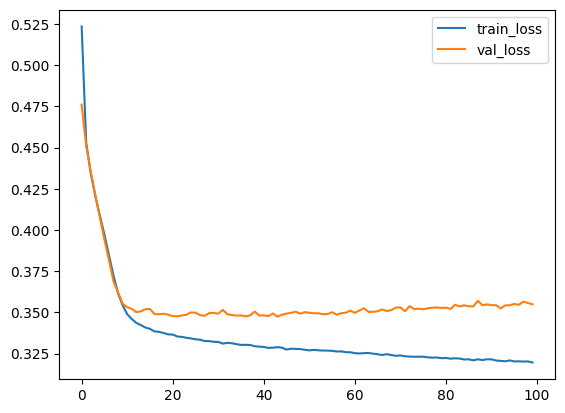

In [31]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()

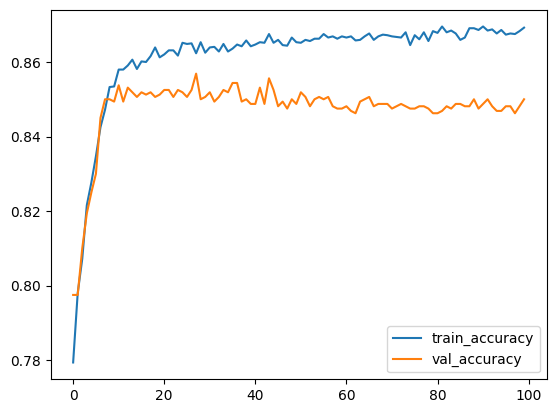

In [32]:
plt.plot(history.history['accuracy'],label = 'train_accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.legend()